# Data Consultation Business Proof of Concept

## Background

I’m working on a proof of concept (PoC) for a data science consulting company that my brother and I are planning to launch. For this PoC, I’ll be using a publicly available dataset from Kaggle that contains sales revenue data from a coffee shop.

The goal is to extract meaningful insights from the data, such as identifying best- and worst-selling items, analyzing seasonal trends in purchases, and determining which store locations are most profitable during specific time periods.

We plan to present these findings through an interactive dashboard that updates in real time with each new transaction. The final analysis will highlight areas of the business that are performing well, as well as opportunities for improvement—each supported by data-driven reasoning.

Through this proof of concept, we aim to demonstrate the value of our approach and attract clients by showing how accessible, actionable insights can help small businesses increase revenue and drive long-term success.

## Data Analysis

### Package imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

### Data Imports and Information

In [89]:
source_folder = Path(r"C:\Users\zhatz\Downloads")
data_file = "coffee-shop-sales-revenue.csv"
sales_data = pd.read_csv(Path(source_folder, data_file))

# Convert transaction date into datetime format and drop time column
sales_data["transaction_datetime"] = sales_data["transaction_date"] + sales_data["transaction_time"]
sales_data["transaction_datetime"] = pd.to_datetime(sales_data["transaction_datetime"], unit='D', origin='1899-12-30')
sales_data["transaction_date"] = pd.to_datetime(sales_data["transaction_date"], unit='D', origin='1899-12-30')
sales_data["transaction_time_hour"] = sales_data["transaction_datetime"].dt.hour + sales_data["transaction_datetime"].dt.minute/60
sales_data["transaction_time"] = sales_data["transaction_datetime"].dt.time
sales_data["transaction_total"] = sales_data["transaction_qty"] * sales_data["unit_price"]
sales_data["transaction_time_month"] = sales_data["transaction_datetime"].dt.month

sales_data.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,transaction_datetime,transaction_time_hour,transaction_total,transaction_time_month
0,1,2023-01-01,07:06:10.999987,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,2023-01-01 07:06:10.999987191,7.100000,6.0,1
1,2,2023-01-01,07:08:55.999967,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,2023-01-01 07:08:55.999967922,7.133333,6.2,1
2,3,2023-01-01,07:14:03.999983,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,2023-01-01 07:14:03.999983974,7.233333,9.0,1
3,4,2023-01-01,07:20:23.999970,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2023-01-01 07:20:23.999970966,7.333333,2.0,1
4,5,2023-01-01,07:22:40.999958,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,2023-01-01 07:22:40.999958356,7.366667,6.2,1


In [90]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   transaction_id          149116 non-null  int64         
 1   transaction_date        149116 non-null  datetime64[ns]
 2   transaction_time        149116 non-null  object        
 3   transaction_qty         149116 non-null  int64         
 4   store_id                149116 non-null  int64         
 5   store_location          149116 non-null  object        
 6   product_id              149116 non-null  int64         
 7   unit_price              149116 non-null  float64       
 8   product_category        149116 non-null  object        
 9   product_type            149116 non-null  object        
 10  product_detail          149116 non-null  object        
 11  transaction_datetime    149116 non-null  datetime64[ns]
 12  transaction_time_hour   149116

In [91]:
sales_data.describe()

,transaction_id,transaction_date,transaction_qty,store_id,product_id,unit_price,transaction_datetime,transaction_time_hour,transaction_total,transaction_time_month
count,149116.000000,149116,149116.000000,149116.000000,149116.000000,149116.000000,149116,149116.000000,149116.000000,149116.000000
mean,74737.371872,2023-04-15 11:50:32.173609984,1.438276,5.342063,47.918607,3.382219,2023-04-16 00:04:47.989404160,12.229398,4.686367,3.988881
min,1.000000,2023-01-01 00:00:00,1.000000,3.000000,1.000000,0.800000,2023-01-01 07:06:10.999987191,6.000000,0.800000,1.000000
25%,37335.750000,2023-03-06 00:00:00,1.000000,3.000000,33.000000,2.500000,2023-03-06 13:37:08.000025600,9.083333,3.000000,3.000000
50%,74727.500000,2023-04-24 00:00:00,1.000000,5.000000,47.000000,3.000000,2023-04-24 08:24:32.500007680,11.250000,3.750000,4.000000
75%,112094.250000,2023-05-30 00:00:00,2.000000,8.000000,60.000000,3.750000,2023-05-30 07:16:13.000022528,15.416667,6.000000,5.000000
max,149456.000000,2023-06-30 00:00:00,8.000000,8.000000,87.000000,45.000000,2023-06-30 20:57:18.999993798,20.983333,360.000000,6.000000
std,43153.600016,NaN,0.542509,2.074241,17.930020,2.658723,NaN,3.766091,4.227099,1.673091


### Estimate what store traffic looks like on a daily basis with a histogram

(0.0, 5000.0)

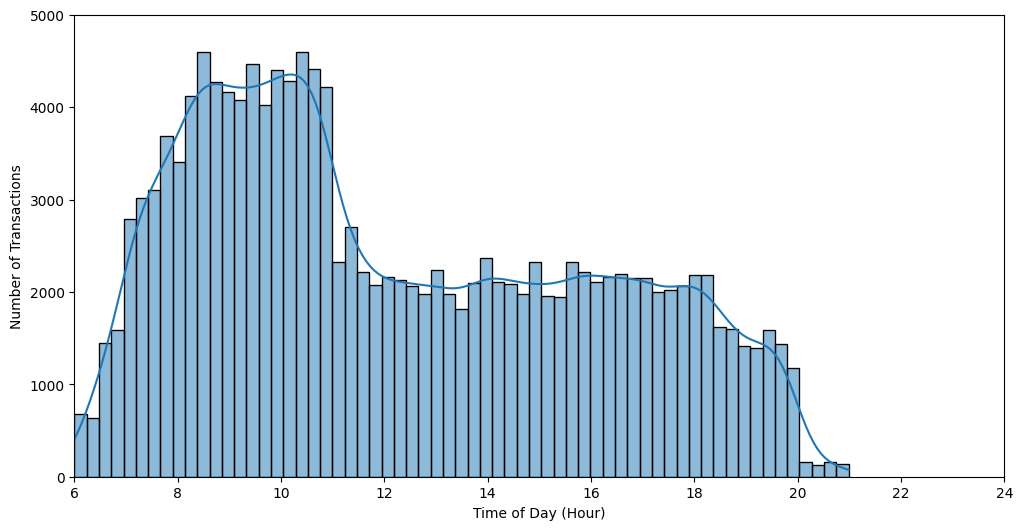

In [46]:
plt.figure(figsize=(12,6))
sns.histplot(data=sales_data, x="transaction_time_hour", kde=True)
plt.xlabel("Time of Day (Hour)")
plt.ylabel("Number of Transactions")
plt.xlim(6, 24)
plt.ylim(0, 5000)

This histogram tells us that the foot traffic to the store peaks around 8am to 10am which is typical for a coffee shop. There's a steep decline around 11am where the traffic remains constant until close to closing hours when another decline is seen, around 7pm.

Early morning hours see low traffic initially but rapidly climb to when the store hits peak hours. Staffing could be coordinated with the high traffic times to reduce delays and get people in and out quicker

Based on this graph it looks like the store closes around 8pm if I had to guess with employees making purchases off hours before going home from a shift most likely. There may be a benefit from closing the store around 6 since a decline in customers can be seen around that time. Those 2 extra hours closed could reduce operational costs to save money and increase profits.

### Histogram to understand which product is being sold the most

Text(0, 0.5, 'Number of Transactions')

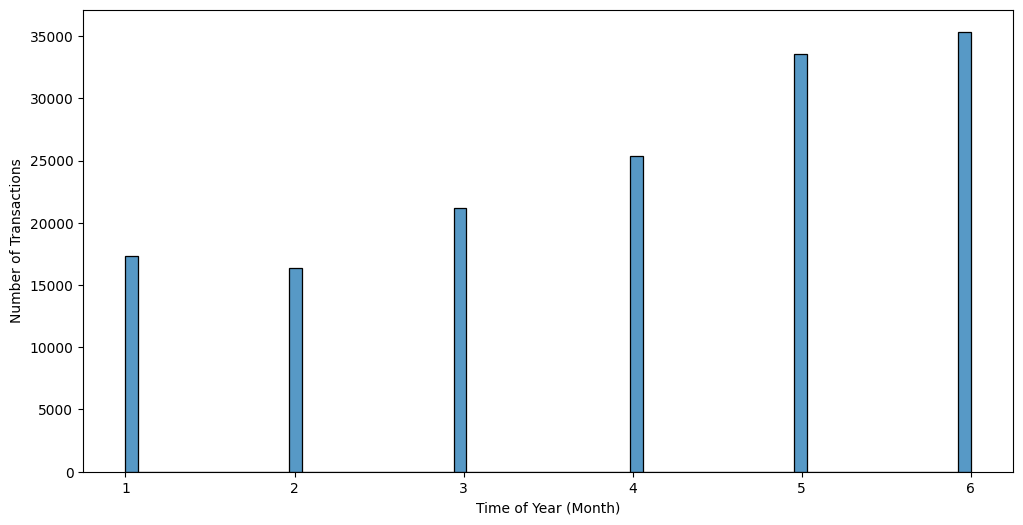

In [94]:
plt.figure(figsize=(12,6))
sns.histplot(data=sales_data, x="transaction_time_month")
plt.xlabel("Time of Year (Month)")
plt.ylabel("Number of Transactions")
# plt.xlim(0, 6)
# plt.ylim(0, 5000)

This histogram displays the numbers of transactions by month. A clear pattern shows that winter months underperform summer months which intuitively makes sense since people are more active outside in the summer as opposed to the winter. 

In [62]:
most_sold_product = sales_data.groupby(by="product_type")["transaction_total"].agg("sum").sort_values(ascending=False)
most_sold_product

product_type
Barista Espresso         91406.20
Brewed Chai tea          77081.95
Hot chocolate            72416.00
Gourmet brewed coffee    70034.60
Brewed Black tea         47932.00
Brewed herbal tea        47539.50
Premium brewed coffee    38781.15
Organic brewed coffee    37746.50
Scone                    36866.12
Drip coffee              31984.00
Pastry                   25655.99
Brewed Green tea         23852.50
Biscotti                 19793.53
Premium Beans            14583.50
Organic Beans             8509.50
Housewares                7444.00
Gourmet Beans             6798.00
Clothing                  6163.00
Regular syrup             6084.80
Espresso Beans            5560.25
Chai tea                  4301.25
House blend Beans         3294.00
Herbal tea                2729.75
Drinking Chocolate        2728.04
Black tea                 2711.85
Sugar free syrup          2324.00
Organic Chocolate         1679.60
Green tea                 1470.75
Green beans               1340.00
N

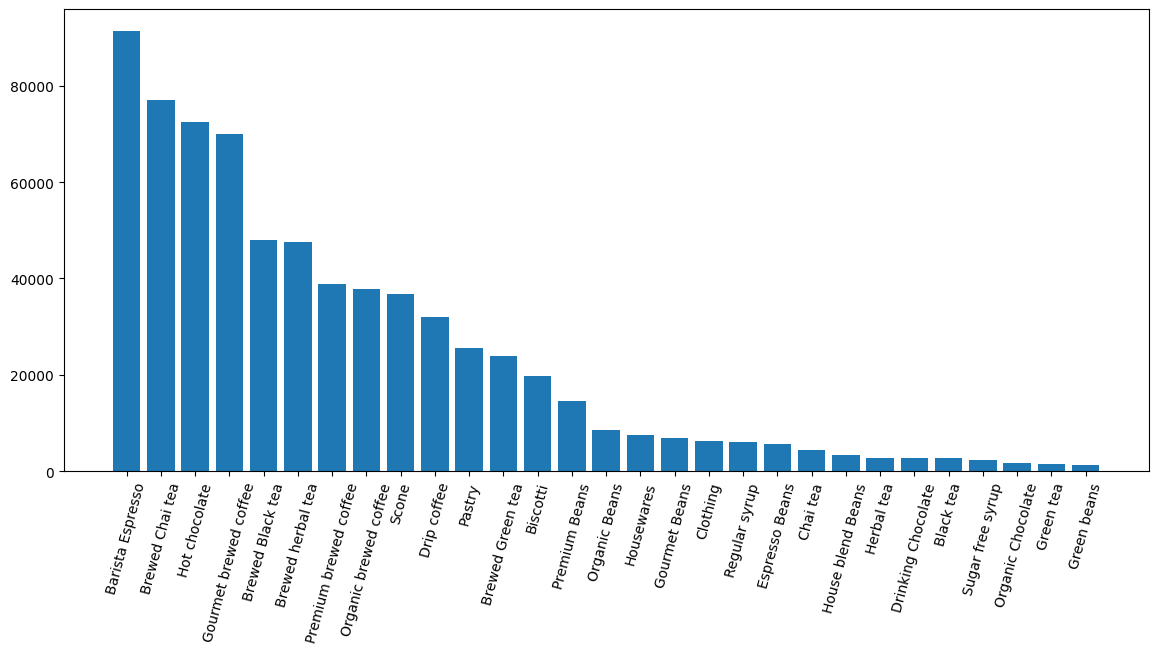

In [80]:
plt.figure(figsize=(14,6))
plt.bar(x=most_sold_product.index, height=most_sold_product.values)
_ = plt.xticks(rotation=75)

In [82]:
best_location = sales_data.groupby(by="store_location")["transaction_total"].agg("sum").sort_values(ascending=False)
best_location

store_location
Hell's Kitchen     236511.17
Astoria            232243.91
Lower Manhattan    230057.25
Name: transaction_total, dtype: float64

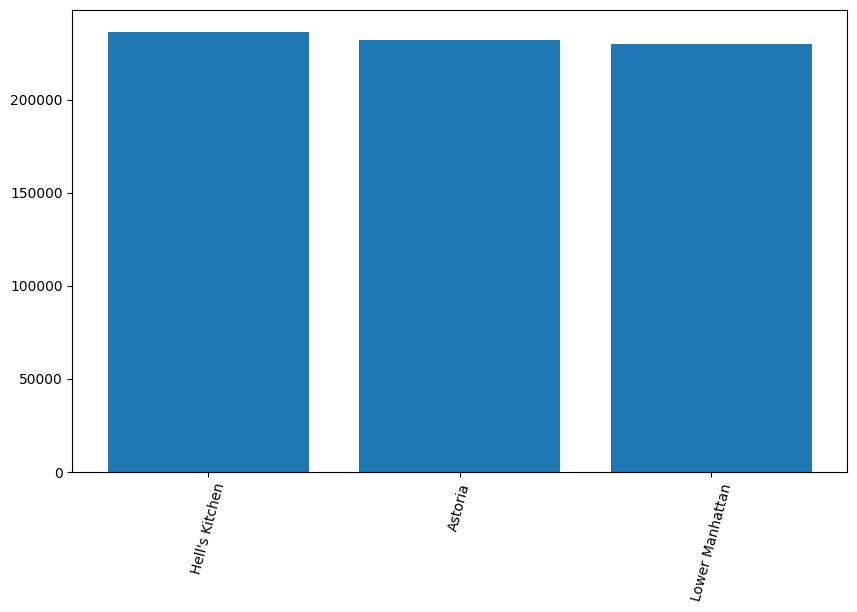

In [85]:
plt.figure(figsize=(10,6))
plt.bar(x=best_location.index, height=best_location.values)
_ = plt.xticks(rotation=75)